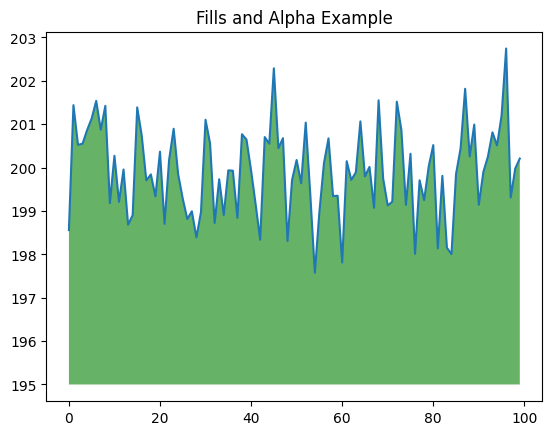

In [37]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

In [38]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) # In BGR format

In [39]:
#== Processing =======================================================================
#-- Read image -----------------------------------------------------------------------
img = img = io.imread('pictures/dark-eyed-junco.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [40]:
#-- Edge detection -------------------------------------------------------------------
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

In [41]:
#-- Find contours in edges, sort by area ---------------------------------------------
contour_info = []
#_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Previously, for a previous version of cv2, this line was: 
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Thanks to notes from commenters, I've updated the code but left this note
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

In [42]:
#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
#-- Smooth mask, then blur it --------------------------------------------------------
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

In [44]:
#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

cv2.imshow('img', masked)                                   # Display

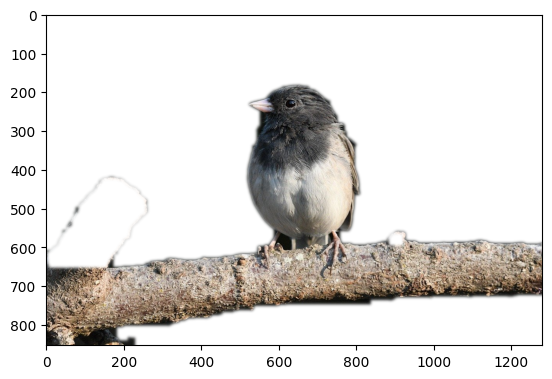

True

In [45]:
# split image into channels
c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(img_a)
plt.show()

# save to disk
cv2.imwrite('picture.png', img_a)


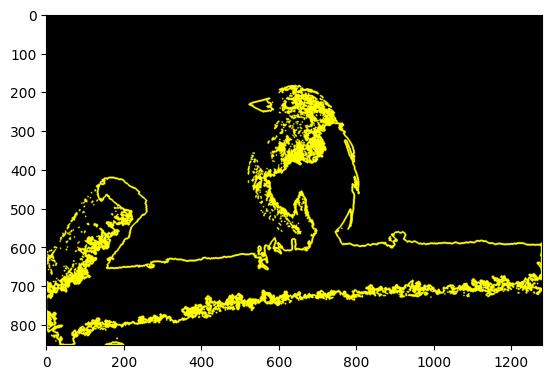

True

In [46]:
import cv2
import numpy as np

image = cv2.imread("pictures/dark-eyed-junco.jpg")
cv2.imshow("Original Image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", gray)

_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
cv2.imshow("Binary image", binary)

contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)
cv2.imshow("Contours", CountersImg)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(CountersImg)
plt.show()

# save to disk
cv2.imwrite('picture.png', CountersImg)

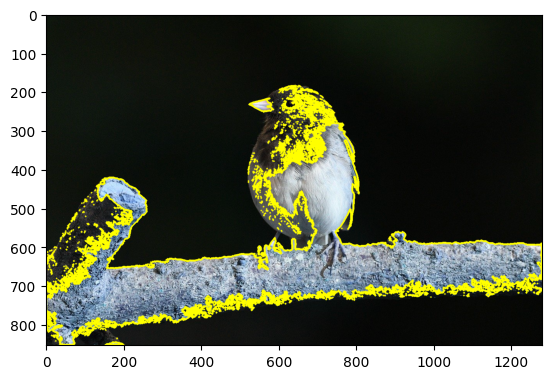

True

In [47]:
import cv2
import numpy as np

image = cv2.imread("pictures/dark-eyed-junco.jpg")
cv2.imshow("Original Image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", gray)

_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
cv2.imshow("Binary image", binary)

contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)
cv2.imshow("Contours", CountersImg)
ImgWithCounter = cv2.drawContours(image, contours, -1, (255, 255, 0), 3)
cv2.imshow("Image with counters", ImgWithCounter)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(ImgWithCounter)
plt.show()

# save to disk
cv2.imwrite('picture.png', ImgWithCounter)

Number of Contours found = 2871


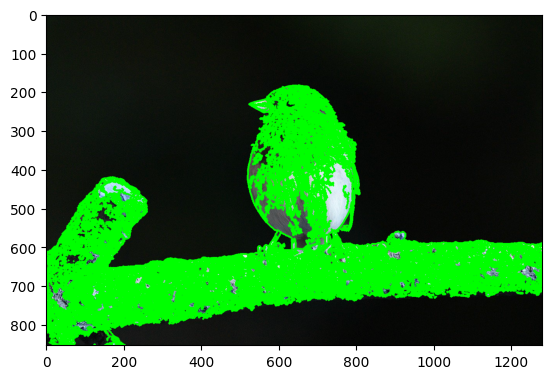

True

In [48]:
import cv2 
import numpy as np 
  
image = cv2.imread('pictures/dark-eyed-junco.jpg') 
#cv2.waitKey(0) 
  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
edged = cv2.Canny(gray, 30, 200) 
#cv2.waitKey(0) 
  
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
cv2.imshow('Canny Edges After Contouring', edged) 
#cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', image) 

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(image)
plt.show()

# save to disk
cv2.imwrite('picture.png', img_a)